<a href="https://colab.research.google.com/github/WLAraujo/Projetos-Dirigidos---IEEE-CS/blob/main/Projeto_Dirigido_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook parcialmente inspirado no notebook disponibilizado em: https://www.kaggle.com/oyeronkealasisi/ecommerce-shipping-data-exploration/comments

# Importando bibliotecas e dados


In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# json token da API do Kaggle
from google.colab import files
files.upload()

In [ ]:
# criando pasta kaggle para salvar o json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# baixando dataset específico
!kaggle datasets download -d prachi13/customer-analytics

  0% 0.00/121k [00:00<?, ?B/s]
100% 121k/121k [00:00<00:00, 17.6MB/s]


In [ ]:
# o arquivo foi baixado como .zip, vamos descompactar
import zipfile
zip_ref = zipfile.ZipFile('customer-analytics.zip', 'r')
zip_ref.extractall('customer-analytics')
zip_ref.close()

In [ ]:
# tranformando no formato de dataframe
analytics=pd.read_csv('/content/customer-analytics/Train.csv')

# Visualização básica dos dados

In [ ]:
# 5 primeiras linhas da tabela
analytics.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
# dimensões da tabela
analytics.shape

(10999, 12)

In [ ]:
# quantos valores únicos temos para cada atributo
analytics.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [ ]:
# informações sobre tipos de dados e valores nulos
analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
# faz um resumo de diversos atributos que estiverem no formato np.number
analytics.describe(include=np.number)

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
# faz um resumo de diversos atributos que estiverem no formato np.object
analytics.describe(include=np.object)

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Fatos interessantes e possíveis de serem vistos com as informações acima:

*   Cerca de 68% dos envios é feito através navios
*   Cerca de 48% dos produtos tem importância baixa
*   Cerca de 50% dos clientes são mulheres, então cerca de 50% dos clientes são homens 

In [ ]:
# vamos ver se existem dados nulos em algum dos atributos
analytics.isnull().any()

ID                     False
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls    False
Customer_rating        False
Cost_of_the_Product    False
Prior_purchases        False
Product_importance     False
Gender                 False
Discount_offered       False
Weight_in_gms          False
Reached.on.Time_Y.N    False
dtype: bool

# Análise exploratória relacionada a gênero

In [ ]:
# vamos criar um novo dataframe que nos indique quantas linhas temos para cada gênero
genero = analytics['Gender'].value_counts() 
genero

F    5545
M    5454
Name: Gender, dtype: int64

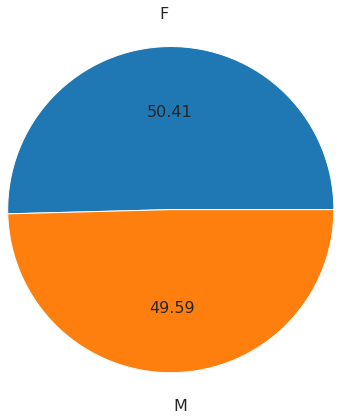

In [ ]:
# vamos plotar um gráfico de pizza que dê a distribuição por gênero
plt.figure(figsize=(7,5))
genero.plot.pie(fontsize=16, labeldistance = 1.2, radius = 1.5, autopct='%.2f')
plt.show()

Vamos ver como a variável que indica gênero se relaciona a outras variáveis

In [ ]:
print(analytics[["Gender", "Customer_care_calls"]].
      groupby(['Gender'], as_index= False).mean().sort_values
      (by='Customer_care_calls', ascending = False))

  Gender  Customer_care_calls
1      M             4.057389
0      F             4.051578


A tabela acima nos faz ver que existe pouca diferença, em média, da quantidade de ligações que homens e mulheres fazer para consultar a situação do transporte

In [ ]:
print(analytics[["Gender", "Customer_rating"]].
      groupby(['Gender'],as_index= False).mean().sort_values
      (by='Customer_rating', ascending = False))

  Gender  Customer_rating
1      M         2.994499
0      F         2.986655


A tabela acima nos faz ver que praticamente não existe viés de avaliação dos produtos relacionado à gênero

In [ ]:
print(analytics[["Gender", "Prior_purchases"]].
      groupby(['Gender'],as_index= False).mean().sort_values
      (by='Prior_purchases', ascending = False))

  Gender  Prior_purchases
0      F         3.581785
1      M         3.553172


A tabela acima nos faz ver que praticamente não parece haver viés de gênero na quantidade de comprar antecipadas de produtos

In [ ]:
print(analytics[["Gender", "Reached.on.Time_Y.N"]].
      groupby(['Gender'],as_index= False).mean().sort_values
      (by='Reached.on.Time_Y.N', ascending = False))

  Gender  Reached.on.Time_Y.N
1      M             0.599010
0      F             0.594409


A tabela acima nos indica que não aparenta haver viés de gênero relacionado a entregas no prazo

Vamos plotar diversos gráficos que comparem as distribuições de variáveis separadas por gênero

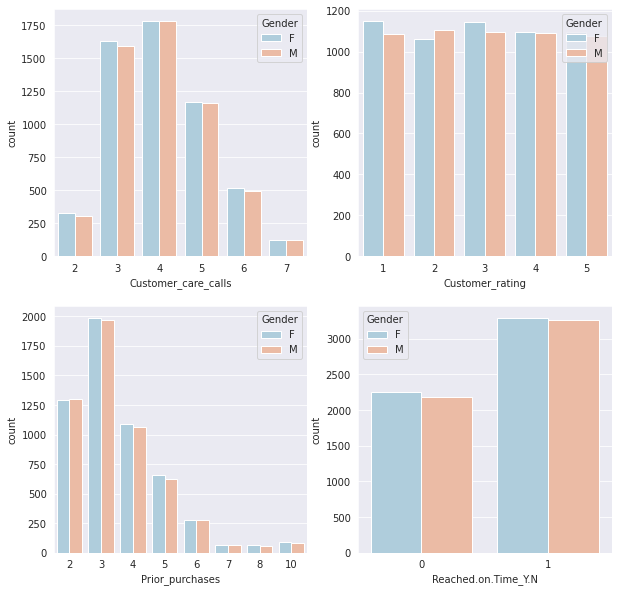

In [ ]:
# vamos definir um grid cinza
sns.set_style('darkgrid')
# vamos definir uma matriz de gráficos 2x2, onde cada figura vai ter tamanho 10x10
f,axes= plt.subplots(2,2, figsize=(10,10))
# abaixo definimos os 4 gráficos das variáveis que analismos acima
sns.countplot(x='Customer_care_calls',hue='Gender',data=analytics,palette='RdBu_r', ax=axes[0,0])
sns.countplot(x='Customer_rating',hue='Gender',data=analytics,palette='RdBu_r', ax=axes[0,1])
sns.countplot(x='Prior_purchases',hue='Gender',data=analytics,palette='RdBu_r', ax=axes[1,0])
sns.countplot(x='Reached.on.Time_Y.N',hue='Gender',data=analytics,palette='RdBu_r', ax=axes[1,1])

# Análise exploratória segundo os galpões da compania


In [ ]:
# vendo quantidade de pedidos em cada galpão
galpao = analytics['Warehouse_block'].value_counts()
galpao

F    3666
D    1834
C    1833
B    1833
A    1833
Name: Warehouse_block, dtype: int64

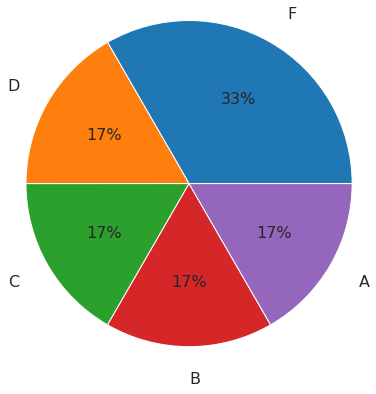

In [ ]:
plt.figure(figsize=(7, 5))
galpao.plot.pie(fontsize=16, autopct='%.0f%%', labeldistance=1.2, radius=1.5)
plt.show()

# Análise exploratória segundo modo de envio



In [ ]:
modoEnvio = analytics['Mode_of_Shipment'].value_counts()
modoEnvio

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

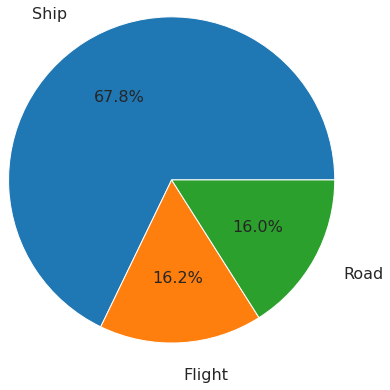

In [ ]:
plt.figure(figsize=(7, 5))
modoEnvio.plot.pie(fontsize=16, autopct='%.1f%%', labeldistance=1.2, radius=1.5)
plt.show()

# Análise exploratória sobre ligações para verificação de status

In [ ]:
ligacoes = analytics['Customer_care_calls'].value_counts()
ligacoes

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

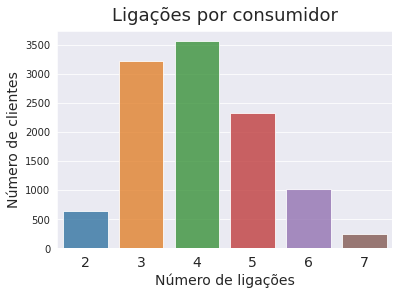

<Figure size 720x504 with 0 Axes>

In [ ]:
# vamos plotar a distribuição de ligações num gráfico de barras
sns.barplot(x=ligacoes.index, y=ligacoes.values, alpha=0.8)
plt.title('Ligações por consumidor', fontsize=18, pad=10)
plt.ylabel('Número de clientes', fontsize=14)
plt.xlabel('Número de ligações', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.figure(figsize=(10, 7))
plt.show()

# Análise exploratória por avaliação

In [ ]:
avaliacao = analytics['Customer_rating'].value_counts()
avaliacao 

3    2239
1    2235
4    2189
5    2171
2    2165
Name: Customer_rating, dtype: int64

É possível ver que existe uma distribuição muito uniforme das avaliações


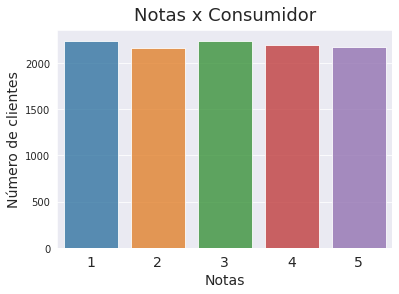

<Figure size 720x504 with 0 Axes>

In [ ]:
# vamos plotar a distribuição de avaliações num gráfico de barras
sns.barplot(x=avaliacao.index, y=avaliacao.values, alpha=0.8)
plt.title('Notas x Consumidor', fontsize=18, pad=10)
plt.ylabel('Número de clientes', fontsize=14)
plt.xlabel('Notas', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.figure(figsize=(10, 7))
plt.show()

# Análise exploratória por compra antecipada

In [ ]:
antecipada = analytics['Prior_purchases'].value_counts()
antecipada

3     3955
2     2599
4     2155
5     1287
6      561
10     178
7      136
8      128
Name: Prior_purchases, dtype: int64

É possível ver que o consumidor médio faz 3 compras antecipadas

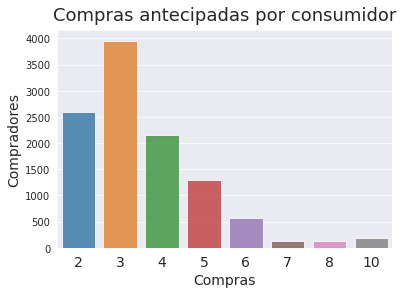

<Figure size 720x504 with 0 Axes>

In [ ]:
sns.barplot(x=antecipada.index, y=antecipada.values, alpha=0.8)
plt.title('Compras antecipadas por consumidor', fontsize=18, pad=10)
plt.ylabel('Compradores', fontsize=14)
plt.xlabel('Compras', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)
plt.figure(figsize=(10, 7))
plt.show()

# Análise exploratória por importância do produto

In [ ]:
importancia = analytics['Product_importance'].value_counts()
importancia

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

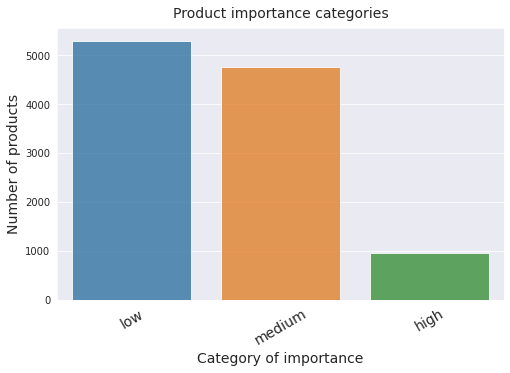

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x=importancia.index, y=importancia.values, alpha=0.8)
plt.title('Product importance categories', fontsize=14, pad=10)
plt.ylabel('Number of products', fontsize=14)
plt.xlabel('Category of importance', fontsize=14)
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=10)
plt.show()

# Análise exploratória por custo do produto

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


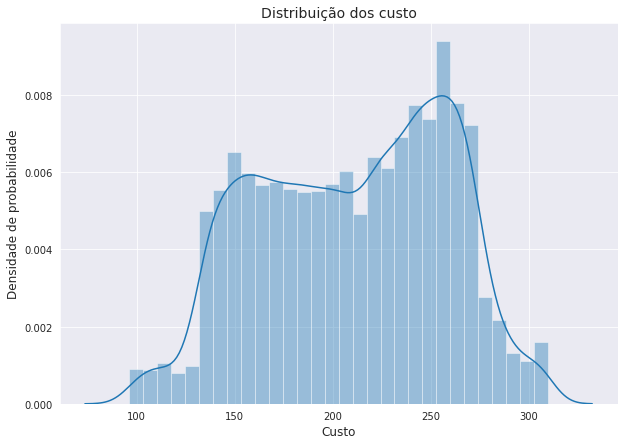

In [ ]:
# Diferente dos outros atributos o custo é um atributo contínuo
custo = analytics['Cost_of_the_Product']
plt.figure(figsize=(10, 7))
sns.distplot(custo)
plt.title('Distribuição dos custo', fontsize=14)
plt.xlabel('Custo', fontsize=12)
plt.ylabel('Densidade de probabilidade', fontsize = 12)
plt.show()

# Análise de correlação da avaliação com outros atributos

In [ ]:
# vamos começar com o seguinte processamento:
# vamos construir a lista colunas que contém somente os atributos que são objetos
colunas = list(analytics.dtypes[analytics.dtypes==object].index)

In [ ]:

list(analytics.dtypes[analytics.dtypes==object].index)

['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

In [ ]:
# agora, vamos converter o tipo de dados de objeto para categoria
for col in colunas:
    analytics[col] = analytics[col].astype('category')

In [ ]:
# vamos agora selecionar somente os atributos do tipo categoria
colunas_cat = analytics.select_dtypes(['category']).columns

In [ ]:
# vamos codificar os atributos do tipo categoria
analytics[colunas_cat] = analytics[colunas_cat].apply(lambda x: x.cat.codes)

In [ ]:
# vamos visualizar o que a codificação de atributos categóricos faz com os atributos
analytics.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [ ]:
# vamos agora criar uma lista de todas as colunas que são atributos (sem ID)
atributos=['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
          'Cost_of_the_Product', 'Prior_purchases','Product_importance', 
          'Gender','Reached.on.Time_Y.N']

In [ ]:
# vamos calcular todas as correlações entre a variável que indica as avaliações e os outros atributos
# já vamos aproveitar e criar um dataframe que associe a cada atributo sua corelação com avaliações
df_corr = pd.DataFrame(columns=['Atributo', 'Correlacao'])
for col in atributos:
    correlacao = analytics['Customer_rating'].corr(analytics[col])
    df_corr = df_corr.append({'Atributo': col, 'Correlacao': correlacao}, ignore_index=True)
df_corr

,Atributo,Correlacao
0,Warehouse_block,0.010169
1,Mode_of_Shipment,0.001679
2,Customer_care_calls,0.012209
3,Cost_of_the_Product,0.009270
4,Prior_purchases,0.013179
5,Product_importance,0.003157
6,Gender,0.002775
7,Reached.on.Time_Y.N,0.013119


([<matplotlib.axis.XTick at 0x7f312230e910>,
 [Text(0, 0, 'Warehouse_block'),
  Text(0, 0, 'Mode_of_Shipment'),
  Text(0, 0, 'Customer_care_calls'),
  Text(0, 0, 'Cost_of_the_Product'),
  Text(0, 0, 'Prior_purchases'),
  Text(0, 0, 'Product_importance'),
  Text(0, 0, 'Gender'),
  Text(0, 0, 'Reached.on.Time_Y.N')])

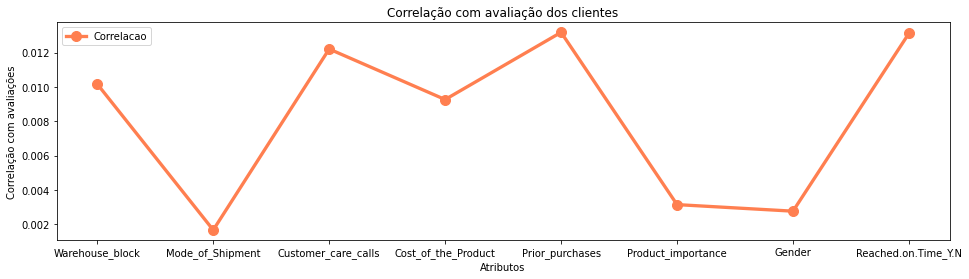

In [ ]:
# agora vamos plotar as correlações com o atributo avalição
df_corr.plot(x = 'Atributo', y = 'Correlacao', kind = 'line',
             color = 'coral', figsize=(16,4), title = 'Correlação com avaliação dos clientes',
             linewidth = 3.3, marker = '.', markersize = 20)
plt.xlabel('Atributos')
plt.ylabel('Correlação com avaliações')
plt.xticks(ticks = df_corr.index, labels = df_corr['Atributo'])